In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import data
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np



def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')



flags = tf.app.flags
FLAGS = flags.FLAGS
flags.DEFINE_string('data_dir', '/tmp/data/', 'Directory for storing data')

mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)

D = 784
H = 175
C = 10

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

with tf.name_scope('Wx_b') as scope:
    '''First Convolution Layer'''
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])

    x_image = tf.reshape(x, [-1,28,28,1])

    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    '''Second Convolution Layer'''
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    '''Densely Connected Layer'''
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    '''Dropout'''
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


    '''Readout Layer'''
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


#Train and Evaluate
epochs = 1500

with tf.name_scope('cost') as scope:
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_conv), reduction_indices=[1]))

with tf.name_scope('optimizer') as scope:
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

with tf.name_scope('accuracy') as scope:
    correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

acc_summary = tf.scalar_summary( 'accuracy', accuracy )
loss_summary = tf.scalar_summary( 'loss', cross_entropy )

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

merged_summary_op = tf.merge_all_summaries()
summary_writer = tf.train.SummaryWriter( "./tf_logs", graph=sess.graph )



for i in range(epochs):
  batch = mnist.train.next_batch(50)
  if i%10 == 0:
    #adding the accuracy to the summary
    summary_str = sess.run(merged_summary_op, feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
    summary_writer.add_summary(summary_str, i)
    #print("step %d"%(i))
    
  sess.run(train_step,feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%sess.run(accuracy, feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))



summary_writer.close()



SyntaxError: invalid syntax (<ipython-input-4-de1090a10bfb>, line 70)

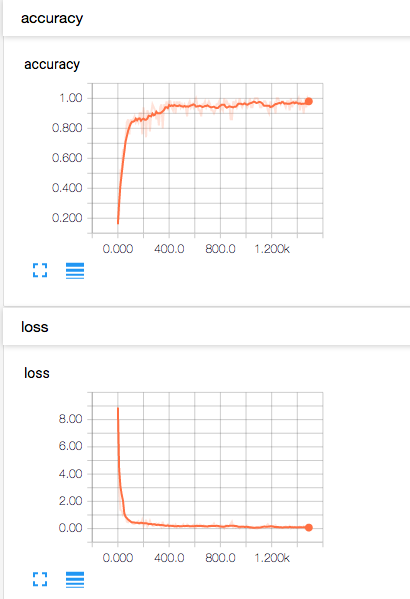

In [4]:
from IPython.display import Image
Image(filename='plots.png') 


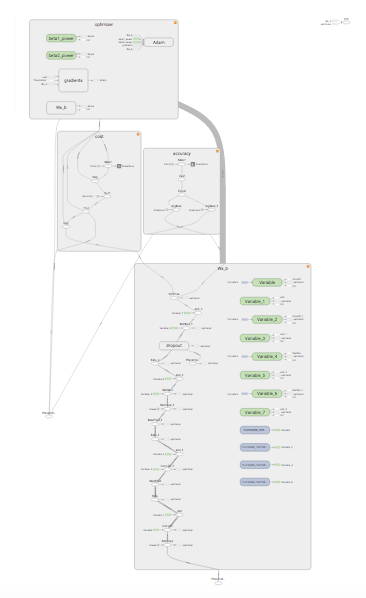

In [3]:
Image(filename='graph.png')
